In [ ]:
import numpy as np
import xarray as xr

# Load the dataset
ds = xr.open_dataset("MIPAS-E_IMK.200502.V8R_CH4_261.nc")

# extract the monthly timestamp from the original dataset
monthly_time = ds.time.resample(time="1M").mean().values

# Define the bin edges for latitude and longitude
lat_bins = np.linspace(-90, 90, 19)
lon_bins = np.linspace(-180, 180, 37)

# Bin the latitude and longitude values
lat_indices = np.digitize(ds.latitude.values, lat_bins)
lon_indices = np.digitize(ds.longitude.values, lon_bins)

# Initialize an empty array to store the binned CH4 values
n_altitudes = ds.target.shape[0]
n_lats = len(lat_bins) - 1
n_lons = len(lon_bins) - 1
n_time = 1
ch4_binned = np.empty((n_altitudes, n_lats, n_lons, n_time))
ch4_binned[:] = np.nan

# Loop over altitudes and fill in the binned CH4 values
for alt_idx in range(n_altitudes):
    ch4_alt = ds.target.values[alt_idx]
    for lat_idx in range(n_lats):
        for lon_idx in range(n_lons):
            mask = (lat_indices == lat_idx+1) & (lon_indices == lon_idx+1)
            ch4_binned[alt_idx, lat_idx, lon_idx, 0] = np.nanmean(ch4_alt[mask])

# Create a new xarray dataset with the binned CH4 values
ds_binned = xr.Dataset(
    {"ch4": (["altitude", "latitude", "longitude", "time"], ch4_binned)},
    coords={
        "altitude": ds.altitude.values,
        "latitude": lat_bins[:-1] + np.diff(lat_bins)/2,
        "longitude": lon_bins[:-1] + np.diff(lon_bins)/2,
        "time": monthly_time
    },
    attrs=ds.attrs,
)

# Write the binned dataset to a netCDF file with CF metadata conventions
ds_binned.to_netcdf("MIPAS-E_IMK.200502.V8R_CH4_261_binned.nc", format="NETCDF4_CLASSIC")


In [ ]:
import matplotlib.pyplot as plt
ds_binned.ch4[22].plot()

In [ ]:
ds_binned.ch4[22].T.mean('longitude').plot()

In [ ]:
ds = xr.open_dataset("/Users/tobias/Downloads/b7f8cc38-c40f-11ed-b8a6-0050569abf1e/MIPAS-E_IMK.200412.V8R_CH4_261.nc")

In [ ]:
ds = xr.open_dataset("/Users/tobias/Downloads/b7f8cc38-c40f-11ed-b8a6-0050569abf1e/MIPAS-E_IMK.200412.V8R_CH4_261.nc")
print(ds.variables)

In [ ]:
ds = xr.open_dataset("/Users/tobias/Downloads/b7f8cc38-c40f-11ed-b8a6-0050569abf1e/MIPAS-E_IMK.200412.V8R_CH4_261.nc").drop_vars('altitude')

In [ ]:
import numpy as np
import xarray as xr
targett= xr.open_dataset("/Users/tobias/Downloads/Mipas/out.nc")

In [ ]:
altt = xr.open_dataset("/Users/tobias/Downloads/Mipas/altout5.nc")

In [4]:
import numpy as np
import xarray as xr
targett= xr.open_dataset("/Users/tobias/Downloads/Mipas/renametest.nc")

In [5]:
altt = xr.open_dataset("/Users/tobias/Downloads/Mipas/altout.nc")

In [6]:
ch4 = targett.merge(altt)

In [7]:
ds=ch4
monthly_time = ds.time.resample(time="1M").mean().values

# Define the bin edges for latitude and longitude
lat_bins = np.linspace(-90, 90, 19)
lon_bins = np.linspace(-180, 180, 37)

# Bin the latitude and longitude values
lat_indices = np.digitize(ds.latitude.values, lat_bins)
lon_indices = np.digitize(ds.longitude.values, lon_bins)

# Initialize an empty array to store the binned CH4 values
n_altitudes = ds.target.shape[0]
n_lats = len(lat_bins) - 1
n_lons = len(lon_bins) - 1
n_time = 1
print(monthly_time,n_altitudes,n_lats,n_lons,n_time)
ch4_binned = np.empty((n_altitudes, n_lats, n_lons, n_time))
ch4_binned[:] = np.nan

# Loop over altitudes and fill in the binned CH4 values
for alt_idx in range(n_altitudes):
    ch4_alt = ds.target.values[alt_idx]
    for lat_idx in range(n_lats):
        for lon_idx in range(n_lons):
            mask = (lat_indices == lat_idx+1) & (lon_indices == lon_idx+1)
            if np.any(mask):
                ch4_binned[alt_idx, lat_idx, lon_idx, 0] = np.nanmean(ch4_alt[mask])
            else:
                ch4_binned[alt_idx, lat_idx, lon_idx, 0] = np.nan

# Create a new xarray dataset with the binned CH4 values
ds_binned = xr.Dataset(
    {"ch4": (["altitude", "latitude", "longitude", "time"], ch4_binned)},
    coords={
        "altitude": ds.altitude.values,
        "latitude": lat_bins[:-1] + np.diff(lat_bins)/2,
        "longitude": lon_bins[:-1] + np.diff(lon_bins)/2,
        "time": monthly_time
    },
    attrs=ds.attrs,
)


['2004-11-29T15:30:08.549652518'] 73 18 36 1


In [ ]:
ds

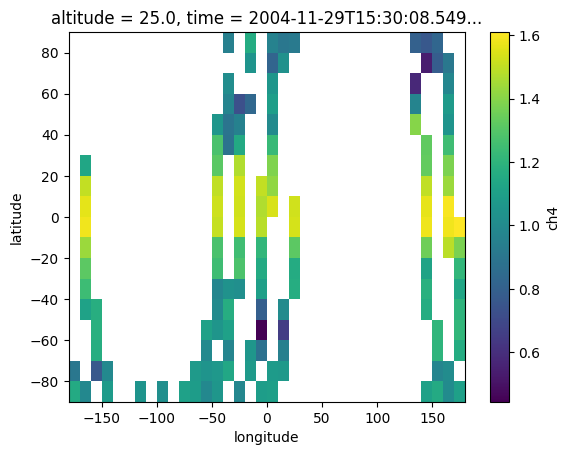

In [8]:
ds_binned.ch4[22].plot()

In [ ]:
import eco

# Open the netCDF file
nc = eco. ('MIPAS-E_IMK.200502.V8R_CH4_261.nc', 'a')

# Drop the variable named 'var_to_drop'
ncdrop(nc, 'var_to_drop')

# Close the netCDF file
nc.close()

In [ ]:
!pip install eco

In [ ]:
from netCDF4 import Dataset

# Open the input netCDF file
input_nc = Dataset('/Users/tobias/Downloads/Mipas/MIPAS-E_IMK.200501.V8R_CH4_261.nc', mode='r')

# Get the variable object for 'altitude'
altitude_var = input_nc.variables['altitude']

# Apply the ncwa operation to the input variable along the 'time' axis
altitude_out = altitude_var[:].mean(axis=1)

# Create a new netCDF file for the output
output_nc = Dataset('MIPAS-E_IMK.200501.V8R_CH4_261_altcorrect.nc', mode='a')

# Copy the global attributes from the input file to the output file
output_nc.setncatts(input_nc.__dict__)



In [ ]:
input_nc

In [ ]:
# Create dimensions and variables for the output file
output_nc.createDimension('altitude', len(altitude_out))
height_var = output_nc.createVariable('height', altitude_var.datatype, ('height',))
altitude_out_var = output_nc.createVariable('altitude', altitude_var.datatype, ('height',))

# Copy the attributes from the input file to the output file
height_var.setncatts(altitude_var.dimensions['height'].__dict__)


#output_nc.createDimension('altitude', len(altitude_out))
#height_var = output_nc.createVariable('altitude', altitude_var.datatype, ('altitude',))
#altitude_out_var = output_nc.createVariable('altitude', altitude_var.datatype, ('altitude',))

## Copy the attributes from the input file to the output file
#height_var.setncatts(altitude_var.dimensions['altitude'].__dict__)
altitude_out_var.setncatts(altitude_var.__dict__)

# Set the values of the output variables
height_var[:] = altitude_out[:]
altitude_out_var[:] = altitude_out[:]

# Close the netCDF files
input_nc.close()
output_nc.close()

In [ ]:
# Open the input netCDF file
input_nc = Dataset('/Users/tobias/Downloads/Mipas/MIPAS-E_IMK.200501.V8R_CH4_261.nc', mode='r')

# Read the altitude and time variables
altitude_var = input_nc.variables['altitude']
time_var = input_nc.variables['time']

# Calculate the mean altitude along the time dimension
altitude_out = altitude_var[:].mean(axis=1)

# Create a new netCDF file for the output
output_nc = Dataset('MIPAS-E_IMK.200501.V8R_CH4_261_altcorrect.nc', mode='a')

# Copy the global attributes from the input file to the output file
output_nc.setncatts(input_nc.__dict__)

# Define dimensions in the output file
#altitude_dim = output_nc.createDimension('altitude', len(altitude_out))
altitude_dim = output_nc.createDimension('altitude_out', len(altitude_out))
time_dim = output_nc.createDimension('time', None)

# Create new altitude and variable variables in the output file
altitude_out_var = output_nc.createVariable('altitude', altitude_var.dtype, ('altitude',))
altitude_out_var.units = altitude_var.units
altitude_out_var.long_name = altitude_var.long_name
var_out = output_nc.createVariable(varname, var.dtype, ('time', 'altitude'))
var_out.units = var.units
var_out.long_name = var.long_name

## Create a new altitude variable in the output file
#altitude_out_var = output_nc.createVariable('altitude', altitude_var.dtype, ('altitude',))
#altitude_out_var.units = altitude_var.units
#altitude_out_var.long_name = altitude_var.long_name

# Write the mean altitude values to the output file
altitude_out_var[:] = altitude_out

# Loop through the input variables and create corresponding output variables
for var_name, var in input_nc.variables.items():
    if var_name == 'altitude':
        # Skip the altitude variable, as we have already created a new one
        continue
    output_var = output_nc.createVariable(var_name, var.dtype, var.dimensions)
    output_var.units = var.units
    output_var.long_name = var.long_name
    output_var[:] = var[:]
    
# Close the files
input_nc.close()
output_nc.close()


In [ ]:
# Open the input netCDF file
input_nc = Dataset('/Users/tobias/Downloads/Mipas/MIPAS-E_IMK.200501.V8R_CH4_261.nc', mode='r')

# Read the altitude and time variables
altitude_var = input_nc.variables['altitude']
time_var = input_nc.variables['time']

# Calculate the mean altitude along the time dimension
altitude_out = altitude_var[:].mean(axis=1)

# Create a new netCDF file for the output
output_nc = Dataset('MIPAS-E_IMK.200501.V8R_CH4_261_corrected.nc', mode='a')

# Copy the global attributes from the input file to the output file
output_nc.setncatts(input_nc.__dict__)

# Define dimensions in the output file
altitude_dim = output_nc.createDimension('altitude', len(altitude_out))
time_dim = output_nc.createDimension('time', None)

# Create new altitude and variable variables in the output file
altitude_out_var = output_nc.createVariable('altitude', altitude_var.dtype, ('altitude',))
altitude_out_var.units = altitude_var.units
altitude_out_var.long_name = altitude_var.long_name
altitude_out_var[:] = altitude_out

# Loop through the input variables and create corresponding output variables
for var_name, var in input_nc.variables.items():
    if var_name == 'altitude':
        # Skip the existing altitude variable
        continue
    output_var = output_nc.createVariable(var_name, var.dtype, var.dimensions)
    output_var.units = var.units
    output_var.long_name = var.long_name
    output_var[:] = var[:]

# Close the files
input_nc.close()
output_nc.close()


In [ ]:
from netCDF4 import Dataset

# Open the input netCDF file
input_nc = Dataset('/Users/tobias/Downloads/Mipas/MIPAS-E_IMK.200501.V8R_CH4_261.nc', mode='r')

# Read the altitude and time variables
altitude_var = input_nc.variables['altitude']
time_var = input_nc.variables['time']

# Calculate the mean altitude along the time dimension
altitude_out = altitude_var[:].mean(axis=1)

# Create a new netCDF file for the output
output_nc = Dataset('MIPAS-E_IMK.200501.V8R_CH4_261_corrected.nc', mode='a')

# Copy the global attributes from the input file to the output file
output_nc.setncatts(input_nc.__dict__)

# Define dimensions in the output file
output_nc.createDimension('altitude', altitude_var.shape[1])
output_nc.createDimension('time', None)

# Create new altitude and variable variables in the output file
altitude_out_var = output_nc.createVariable('altitude', altitude_var.dtype, ('altitude',))
altitude_out_var.units = altitude_var.units
altitude_out_var.long_name = altitude_var.long_name
altitude_out_var[:] = altitude_out

# Loop through the input variables and create corresponding output variables
for var_name, var in input_nc.variables.items():
    if var_name == 'altitude':
        # Skip the existing altitude variable
        continue
    output_var = output_nc.createVariable(var_name, var.dtype, var.dimensions)
    output_var.units = var.units
    output_var.long_name = var.long_name
    output_var[:] = var[:]

# Close the files
input_nc.close()
output_nc.close()

In [2]:
from netCDF4 import Dataset

# Open the input netCDF file
input_nc = Dataset('/Users/tobias/Downloads/Mipas/MIPAS-E_IMK.200501.V8R_CH4_261.nc', mode='r')

# Read the altitude and time variables
altitude_var = input_nc.variables['altitude']
time_var = input_nc.variables['time']

# Calculate the mean altitude along the time dimension
altitude_out = altitude_var[:].mean(axis=1)

# Create a new netCDF file for the output
output_nc = Dataset('MIPAS-E_IMK.200501.V8R_CH4_261_corrected.nc', mode='a')

# Copy the global attributes from the input file to the output file
output_nc.setncatts(input_nc.__dict__)

# Define dimensions in the output file
altitude_dim_out = output_nc.createDimension('altitude_out', altitude_var.shape[1])
time_dim_out = output_nc.createDimension('time', None)

# Create new altitude and variable variables in the output file
altitude_out_var = output_nc.createVariable('altitude_out', altitude_var.dtype, ('altitude_out',))
altitude_out_var.units = altitude_var.units
altitude_out_var.long_name = altitude_var.long_name
altitude_out_var[:] = altitude_out

for var_name, var in input_nc.variables.items():
    if var_name == 'altitude':
        # Skip the existing altitude variable
        continue
    output_var = output_nc.createVariable(var_name, var.dtype, var.dimensions)
    output_var.units = var.units
    output_var.long_name = var.long_name
    output_var[:] = var[:]

# Close the files
input_nc.close()
output_nc.close()

RuntimeError: NetCDF: String match to name in use